<a href="https://colab.research.google.com/github/Sangwonsdsd/KNN-Numpy/blob/master/K_Median_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# 예제 데이터 셋 
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/kmedian_dataset.csv
dataset = np.loadtxt("./kmedian_dataset.csv",delimiter=',')

--2021-10-21 12:19:23--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/kmedian_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.146.57
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.146.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 546 [text/csv]
Saving to: ‘kmedian_dataset.csv’

kmedian_dataset.csv 100%[===================>]     546  --.-KB/s    in 0s      

2021-10-21 12:19:23 (41.1 MB/s) - ‘kmedian_dataset.csv’ saved [546/546]



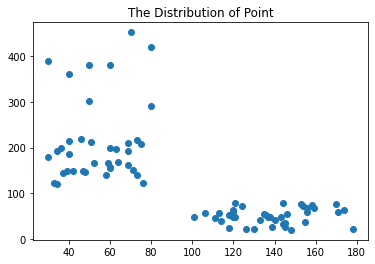

In [3]:
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0], dataset[:,1])
plt.show()

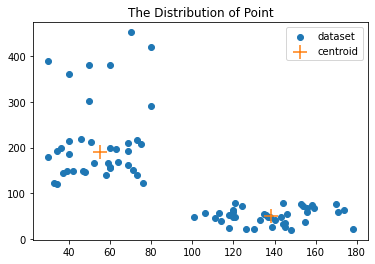

In [22]:
# 예제 데이터셋 시각화
centers = np.array([[ 55. , 190. ],
                    [138.5,  50. ]])
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0],dataset[:,1],label='dataset')
plt.scatter(centers[:,0],centers[:,1],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

In [27]:

def cluster_kmeans(dataset, k):    
    # (1) 중심점 초기화
    min_x = dataset[:,0].min()
    max_x = dataset[:,0].max() 
    min_y = dataset[:,1].min()
    max_y = dataset[:,1].max() 

    center_x = np.random.uniform(low=min_x, high=max_x, size=k)
    center_y = np.random.uniform(low=min_y, high=max_y, size=k)
    centroids = np.stack([center_x,center_y],axis=-1)
    
    # (2) ~ (5) 순회
    num_data = dataset.shape[0]
    cluster_per_point = np.zeros((num_data)) # 각 점 별 군집

    counter = 0
    while True:
        prev_cluster_per_point = cluster_per_point
        
        # (2) 거리 계산()
        diff_mat = np.abs(centroids.reshape(-1,1,2) - dataset.reshape(1,-1,2))
        dists = diff_mat.sum(axis=-1)
        # (3) 각 데이터를 거리가 가장 가까운 군집으로 할당
        cluster_per_point = dists.argmin(axis=0)
        
        # (4) 각 군집 별 점들의 중앙값을 계산 후, 군집의 중심점을 다시 계산
        for i in range(k):
            centroids[i] = dataset[(cluster_per_point,i)].mean(axis=0)

        if np.all(prev_cluster_per_point == cluster_per_point):
            break

        counter += 1
        plt.title("{}th Distribution of Dataset".format(counter))
        for idx, color in enumerate(['r','g','b','y']):
            mask = (cluster_per_point==idx)
            plt.scatter(dataset[mask,0],dataset[mask,1],
                        label='dataset', c=color)
            plt.scatter(centroids[:,0],centroids[:,1],
                        s=200, label="centroid", marker='+')
        plt.show()
    
    return centroids

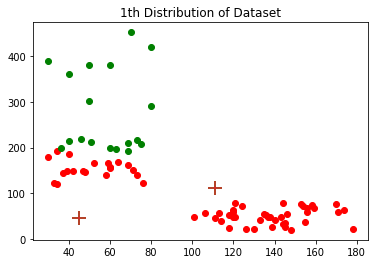

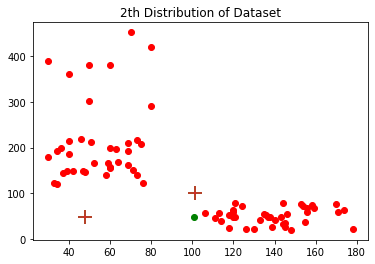

array([[101.56410256, 101.56410256],
       [ 47.83333333,  47.83333333]])

In [28]:
cluster_kmeans(dataset,2)